
#*Bonificación*

Bonificacion-opcional  : Diseñe e implemente en simulación sobre Python (cuaderno de Collaboratory), el proceso de digitalizacion de la señal del punto 2.1, utilizando una tarjeta de adquisicion de 3 bits con entrada analoga de 0 a 5 v. 


Teniendo la señal:
<dd>
$$x(t)= 7\sin\left(4t - \frac{π}{2}\right)-2\cos\left(5t\right)+2\cos\left(10t\right)$$
</dd>

Siendo las frecuencias angulares:

$$\omega_1 = 4$$ 

$$\omega_2= 5$$ 

$$\omega_3= 10 $$ 

Y con periodos de:

$$T_1=\frac{2π}{4}= \frac{π}{2}$$

$$T_2=\frac{2π}{5}$$

$$T_1=\frac{2π}{10}= \frac{π}{5}$$

Y como al tener la relación de frecuencias como un racional, la señal es cuasi periodica con un periodo T igual a:

$$T=kT_1=iT_2=rT_3$$

$$T=k\frac{π}{2}=i\frac{2π}{5}=r\frac{π}{5}$$

Dejandolos todos en enteros

$$\frac{10}{π}T=k5=i4=r2$$

Sacamos MCM(5,4,2)= 20

Despejamos las variables

$$k5=20 →
K=4$$

$$i4=20→
i=5$$

$$r2=20→
r=10$$

Finalmente se saca el periodo de la señal cuasi-periodica:

$$\frac{10}{π}T=k5 →T= \frac{π}{10} *4*5$$

$$T=2\pi$$

Teniendo estos valores si podemos discretizar la señal, acondicionarla y digitalizarla con la tarjeta de 3 bits:




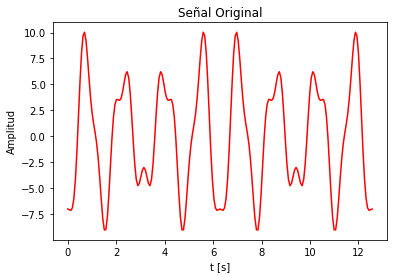

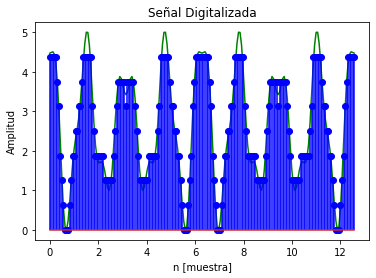

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

def my_ceropen(x,ymin, ymax ): #en general se pueden definir valores por defecto 
  '''
  Codigo base para simular proceso de cero y pendiente
  Se ingresa arreglo de numpy y los valores min  y max despues de cero y pendiente
  '''
  xmax = max(x) # x.max()
  xmin = min(x) # x.min()
  m = (ymax - ymin)/(xmax - xmin)
  c = ymin - m*xmin
  yv = m*x + c
  return yv 


  
T1 = 1*np.pi/2 #perido señal 1
T2 = 2*np.pi/5 #perido señal 2
T3 = 1*np.pi/5 #perido señal 3
F1 = 1/T1
F2 = 1/T2
F3 = 1/T3
T = 2*np.pi #perido cuasiperiódica
Fs = 10*max(F1,F2,F3) #frecuencia muestreo, cumpliendo la relación de nyquist solo nos fijamos en la mayor
t = np.arange(0,2*T,1/Fs) #vector de tiempo, se muestran 2 periodos para ver la repetición de la señal
xo = 7*np.sin(4*t-np.pi/2)-2*np.cos(5*t)+2*np.cos(10*t) #definimos la señal
xhmax = 5 # los valores de voltaje de  nuestro digitalizador
xhmin = 0
xa = my_ceropen(xo,xhmax, xhmin).reshape(-1,1)#aplicar cero y pendiente de 0 a 10
#asegurar vector columna

#cuantizar
nbits = 3 #número bits de nuestro digitalizador
Ne = 2**nbits #cantidad de estados
res = (xhmax-xhmin)/Ne #resolución cuantización
ve = np.arange(xhmin,xhmax,res).reshape(-1,1)#vector de estados
#asegurar vector columna

xd = np.zeros(len(xa)) #señal cuantizada, arreglo de 0 inicialmete
for i in range(len(xa)): #recorrer señal cero y pendiente
    xd[i] = ve[np.argmin(cdist(xa[i].reshape(-1,1),ve))] #se cálcula la distancia desde cada punto al vector de estados


#graficación de las señales original y digitalizada
plt.plot(t,xo,'r',label='x(t)')
plt.xlabel('t [s]')
plt.ylabel('Amplitud')
plt.title('Señal Original')
plt.show()
plt.plot(t,xa,'g',label='')
plt.stem(t,xd,'b',label='')
plt.xlabel('n [muestra]')
plt.ylabel('Amplitud')
plt.title('Señal Digitalizada')

plt.show()